In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
apple = pd.read_csv("./Dataset/aapl.csv")
apple['Date'] = pd.to_datetime(apple['Date'])
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-11,10.526428,10.615714,10.521428,10.548572,9.115436,427753200
1,2010-10-12,10.550357,10.696428,10.446072,10.662143,9.213575,558544000
2,2010-10-13,10.721429,10.784286,10.707143,10.719286,9.262955,630092400
3,2010-10-14,10.774643,10.802500,10.728572,10.796785,9.329926,435296400
4,2010-10-15,10.980000,11.250000,10.889643,11.240714,9.713540,922194000
...,...,...,...,...,...,...,...
2513,2020-10-05,113.910004,116.650002,113.550003,116.500000,116.500000,106243800
2514,2020-10-06,115.699997,116.120003,112.250000,113.160004,113.160004,161498200
2515,2020-10-07,114.620003,115.550003,114.129997,115.080002,115.080002,96849000
2516,2020-10-08,116.250000,116.400002,114.589996,114.970001,114.970001,83477200


Text(0, 0.5, 'Stock Price($)')

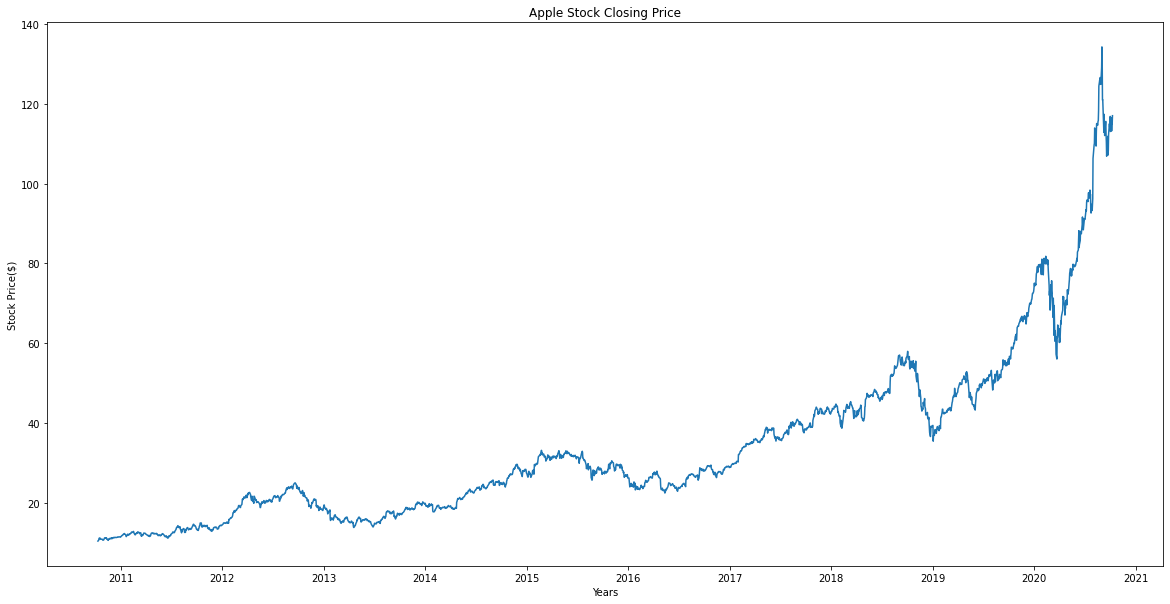

In [10]:
plt.figure(figsize = (20, 10))
plt.plot(apple['Date'], apple['Close'])
plt.title("Apple Stock Closing Price")
plt.xlabel("Years")
plt.ylabel("Stock Price($)")

In [26]:
#?np.polyfit
y = apple['Close'].to_list()
x = [i for i in range(len(apple))]
coeffs = np.polyfit(x, y, 6)
coeffs
y_fit = np.polyval(coeffs, x)

len(y_fit) == len(x)

True

Text(0, 0.5, 'Stock Price($)')

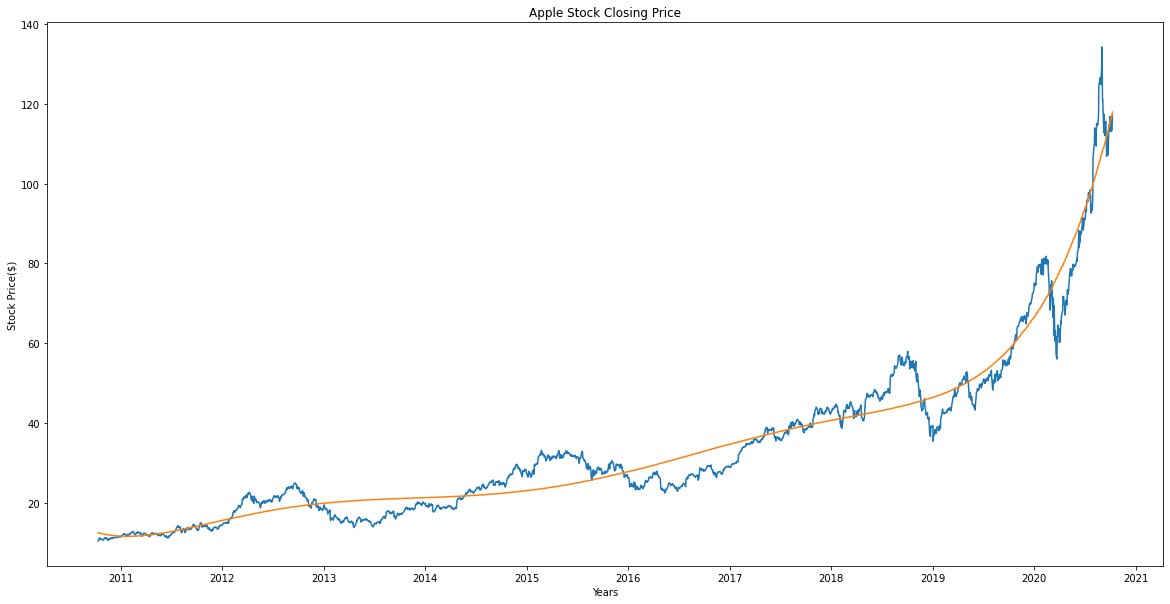

In [27]:
plt.figure(figsize = (20, 10))
plt.plot(apple['Date'], apple['Close'])

plt.plot(apple['Date'],y_fit)

plt.title("Apple Stock Closing Price")
plt.xlabel("Years")
plt.ylabel("Stock Price($)")

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri')]

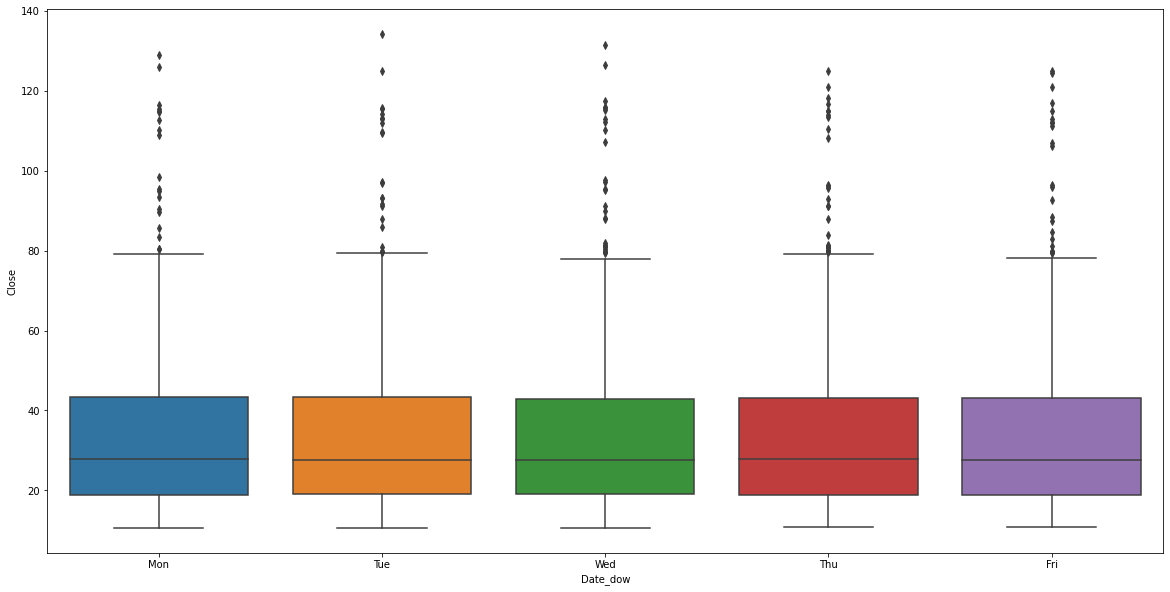

In [34]:
import seaborn as sns
apple['Date_dow'] = apple['Date'].dt.dayofweek

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.boxplot(x = apple['Date_dow'], y = apple['Close'])
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri')]

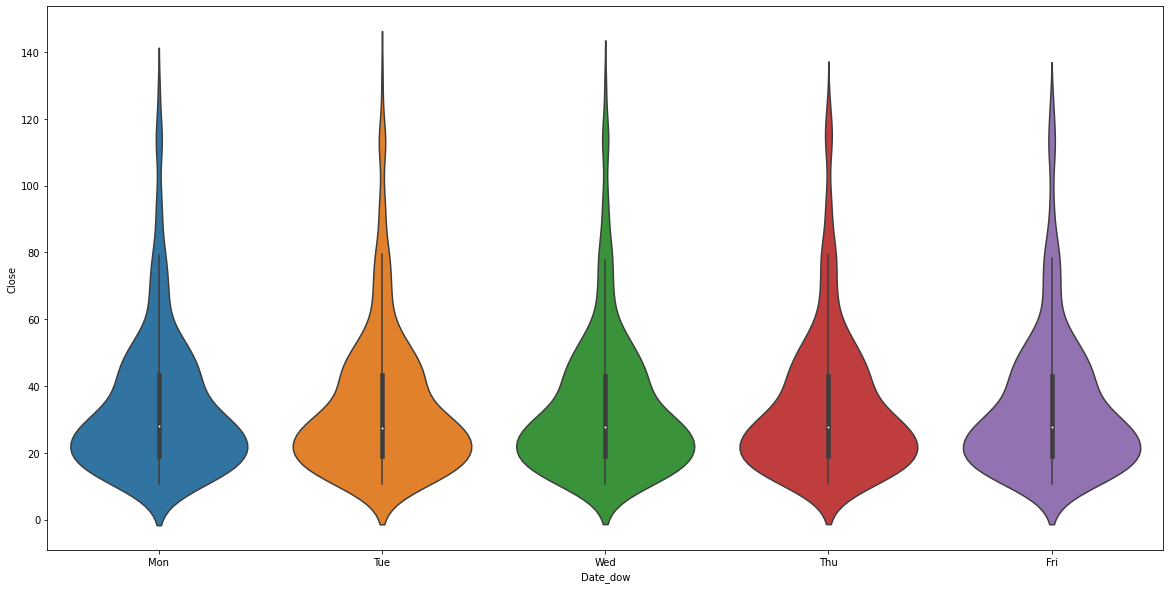

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.violinplot(x = apple['Date_dow'], y = apple['Close'])
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

In [102]:
# Convert close to dict

close = apple['Close'].to_list()
date = apple['Date'].dt.strftime('%m-%d').to_list()

date_dict = {}
for i in range(len(date)):
    if date[i] not in date_dict:
        date_dict.update({date[i]:[]})
    date_dict[date[i]].append(close[i])
        
len(date_dict)

363

In [103]:
# l = [i for i in l]
date_dict = {k : sum(v)/len(v) for k, v in date_dict.items()}
len(date_dict)

363

In [45]:
?sns.heatmap

In [111]:
date_list = [[np.nan for _ in range(31)] for _ in range(12)]

In [112]:
def dateStrip(str_date: str) -> (int, int):
    str_date = str_date.split('-', 1)
    str_date = [int(tt) for tt in str_date]
    return str_date[0], str_date[1]

In [113]:
for k, v in date_dict.items():
    month, day = dateStrip(k)
    date_list[month - 1][day - 1] = v


<AxesSubplot:>

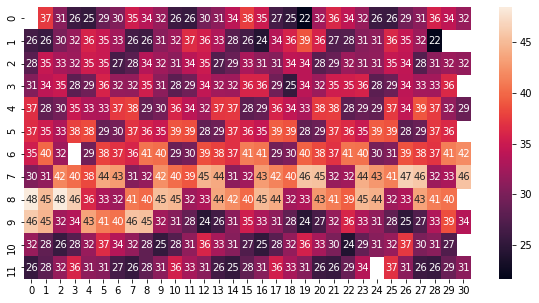

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.heatmap(date_list, annot = True)

In [1]:
import sys
sys.path

# import os
# os.path

# print(sys.executable)

['/Users/jihoonkang/Codable_FA20/Week 8',
 '/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python38.zip',
 '/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8',
 '/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload',
 '',
 '/Users/jihoonkang/Library/Python/3.8/lib/python/site-packages',
 '/usr/local/lib/python3.8/site-packages',
 '/Users/jihoonkang/Library/Python/3.8/lib/python/site-packages/IPython/extensions',
 '/Users/jihoonkang/.ipython']